In [1]:
!pip install pandas
!pip install sklearn
!pip install itertools
!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from itertools import combinations
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv("N_aryl_N_alkyl_indigo.csv")
df

,kobs_MeCN,ln(kobs)_MeCN,kobs_toluene,ln(kobs)_toluene,L_C1-C2,Occupancy_C1-O,Energy_C1-O,LUMO,HOMO,dipole moment,polarizability,Ster_L,Ster_B1,Ster_B5,Ar_NBO_C1,Ar_NBO_C2,Ar_NBO_=O,Ar_NBO_-O,Ar_I_C=O,Ar_v_C=O
0,0.0816,-2.50593,0.0315,-3.45777,1.49120,1.99461,-1.06189,-0.04590,-0.33555,1.784807,81.547333,5.74,1.70,3.22,0.802,-0.141,-0.588,-0.696,343.9081,1859.57
1,0.1754,-1.74069,0.0704,-2.65356,1.48833,1.99453,-1.07192,-0.05216,-0.33184,0.782481,121.686333,9.37,1.89,3.35,0.803,-0.159,-0.596,-0.699,298.9440,1851.44
2,0.0862,-2.45109,0.0465,-3.06830,1.49096,1.99317,-1.06423,-0.08041,-0.35253,3.631527,105.616333,7.72,1.70,3.23,0.802,-0.148,-0.588,-0.696,370.6431,1857.10
3,0.1748,-1.74411,0.0689,-2.67510,1.48905,1.99440,-1.05203,-0.04828,-0.34294,2.001726,101.253000,7.75,2.17,3.22,0.804,-0.159,-0.593,-0.698,375.6318,1854.42
4,0.2628,-1.33636,0.0907,-2.40020,1.48338,1.99309,-1.01496,-0.03774,-0.29315,2.424742,164.862000,10.61,1.70,3.24,0.807,-0.074,-0.610,-0.707,465.2161,1844.58
5,0.1512,-1.88915,0.0843,-2.47337,1.48950,1.99453,-1.06054,-0.06545,-0.33797,1.379376,105.074667,7.80,1.70,3.24,0.802,-0.152,-0.594,-0.697,212.6175,1851.91
6,0.5356,-0.62437,0.1708,-1.76726,1.48284,1.99447,-1.04181,-0.02018,-0.29271,2.835363,114.194000,7.73,1.70,4.26,0.807,-0.192,-0.607,-0.704,443.2582,1843.97
7,0.1825,-1.70101,0.0711,-2.64367,1.48677,1.99448,-1.03917,-0.06295,-0.30681,4.854161,195.570667,9.03,1.70,8.74,0.807,-0.169,-0.601,-0.697,440.9969,1848.30
8,0.4249,-0.85590,0.1447,-1.93309,1.48546,1.99298,-1.05063,-0.06356,-0.30663,0.421494,159.631000,11.48,1.98,3.31,0.822,-0.200,-0.606,-0.705,380.0807,1846.89
9,0.2442,-1.40977,0.1104,-2.20365,1.48320,1.99457,-1.04676,-0.03350,-0.32519,1.187799,107.261667,9.17,2.01,3.62,0.805,-0.204,-0.601,-0.701,403.8310,1848.72


In [3]:
parm = ['L_C1-C2', 'Occupancy_C1-O', 'Energy_C1-O', 'LUMO', 'HOMO', 'dipole moment', 'polarizability', 'Ster_L', 'Ster_B1', 'Ster_B5', 'Ar_NBO_C1', 'Ar_NBO_C2', 'Ar_NBO_=O', 'Ar_NBO_-O', 'Ar_I_C=O', 'Ar_v_C=O']
df_x = df[parm]
scaler = StandardScaler()
df[parm] = scaler.fit_transform(df_x)
df

,kobs_MeCN,ln(kobs)_MeCN,kobs_toluene,ln(kobs)_toluene,L_C1-C2,Occupancy_C1-O,Energy_C1-O,LUMO,HOMO,dipole moment,polarizability,Ster_L,Ster_B1,Ster_B5,Ar_NBO_C1,Ar_NBO_C2,Ar_NBO_=O,Ar_NBO_-O,Ar_I_C=O,Ar_v_C=O
0,0.0816,-2.50593,0.0315,-3.45777,1.191041,0.715356,0.072176,-0.192630,-1.035581,-0.354393,-1.035285,-1.613669,-0.550915,-0.649972,-0.388667,0.700289,1.604613,1.299867,-0.931532,2.079190
1,0.1754,-1.74069,0.0704,-2.65356,0.656616,0.605301,-0.066659,-0.564647,-0.866368,-1.256898,-0.294653,0.390730,0.146911,-0.582962,-0.218625,0.367321,0.579613,0.464238,-1.721114,0.581004
2,0.0862,-2.45109,0.0465,-3.06830,1.146351,-1.265629,0.039786,-2.243476,-1.810034,1.308412,-0.591171,-0.520360,-0.550915,-0.644818,-0.388667,0.570802,1.604613,1.299867,-0.462058,1.624022
3,0.1748,-1.74411,0.0689,-2.67510,0.790688,0.426462,0.208658,-0.334068,-1.372637,-0.159077,-0.671682,-0.503795,1.175285,-0.649972,-0.048583,0.367321,0.963988,0.742781,-0.374455,1.130155
4,0.2628,-1.33636,0.0907,-2.40020,-0.265129,-1.375684,0.721781,0.292299,0.898273,0.221810,0.502012,1.075429,-0.550915,-0.639663,0.461542,1.939669,-1.214137,-1.764106,1.198669,-0.683147
5,0.1512,-1.88915,0.0843,-2.47337,0.874483,0.605301,0.090863,-1.354440,-1.145956,-0.719448,-0.601166,-0.476186,-0.550915,-0.639663,-0.388667,0.496809,0.835863,1.021324,-3.237030,0.667615
6,0.5356,-0.62437,0.1708,-1.76726,-0.365683,0.522760,0.350124,1.335847,0.918342,0.591538,-0.432899,-0.514839,-0.550915,-0.113892,0.461542,-0.243119,-0.829762,-0.928477,0.813082,-0.795557
7,0.1825,-1.70101,0.0711,-2.64367,0.366126,0.536517,0.386666,-1.205871,0.275244,2.409284,1.068639,0.202990,-0.550915,2.195375,0.461542,0.182339,-0.061012,1.021324,0.773373,0.002369
8,0.4249,-0.85590,0.1447,-1.93309,0.122190,-1.527009,0.228037,-1.242121,0.283454,-1.581934,0.405491,1.555822,0.477460,-0.603581,3.012170,-0.391105,-0.701637,-1.207020,-0.296332,-0.257464
9,0.2442,-1.40977,0.1104,-2.20365,-0.298647,0.660328,0.281606,0.544272,-0.563063,-0.891945,-0.560812,0.280295,0.587643,-0.443788,0.121458,-0.465098,-0.061012,-0.092848,0.120730,0.079766


In [4]:
for i in range (1, 5):
  for c in combinations(parm, i):
    x = df[list(c)]
    y = df['ln(kobs)_MeCN']
    regr = linear_model.LinearRegression()
    regr.fit(x,y)
    y_pred = regr.predict(x)
    r2 = regr.score(x,y)
    if r2 > 0.85:
      print(list(c))
      print("rmse =", mean_squared_error(y, y_pred))
      print("r2 =", regr.score(x,y))
      print("")

['L_C1-C2', 'Ar_NBO_C2', 'Ar_NBO_=O']
rmse = 0.04286380478725077
r2 = 0.8526458928393931

['L_C1-C2', 'Occupancy_C1-O', 'Ar_NBO_C2', 'Ar_NBO_=O']
rmse = 0.042757155194526164
r2 = 0.8530125251435708

['L_C1-C2', 'Energy_C1-O', 'Ar_NBO_C2', 'Ar_NBO_=O']
rmse = 0.042856217308576326
r2 = 0.8526719765282121

['L_C1-C2', 'LUMO', 'Ar_NBO_C2', 'Ar_NBO_=O']
rmse = 0.03295540401595153
r2 = 0.8867082808213049

['L_C1-C2', 'LUMO', 'Ar_NBO_C2', 'Ar_v_C=O']
rmse = 0.041966038851993806
r2 = 0.8557321680425767

['L_C1-C2', 'HOMO', 'Ar_NBO_C2', 'Ar_NBO_=O']
rmse = 0.04279640147804821
r2 = 0.8528776070909979

['L_C1-C2', 'dipole moment', 'Ar_NBO_C2', 'Ar_NBO_=O']
rmse = 0.036646693395854246
r2 = 0.8740186315112004

['L_C1-C2', 'polarizability', 'Ar_NBO_C2', 'Ar_NBO_=O']
rmse = 0.03873295839408656
r2 = 0.8668466196554916

['L_C1-C2', 'Ster_L', 'Ar_NBO_C2', 'Ar_NBO_=O']
rmse = 0.04087247750997595
r2 = 0.8594915346218666

['L_C1-C2', 'Ster_B1', 'Ar_NBO_C2', 'Ar_NBO_=O']
rmse = 0.04276858690658279
r2 = 0.85

In [5]:
x1 = df[['L_C1-C2', 'LUMO', 'Ar_NBO_C2', 'Ar_NBO_=O']]
y1 = df['ln(kobs)_MeCN']
regr = linear_model.LinearRegression()
regr.fit(x1,y1)
y_pred1 = regr.predict(x1)
r2_1 = regr.score(x1,y1)
print("rmse =", mean_squared_error(y1, y_pred1))
print("r2 =", regr.score(x1,y1))
print(regr.coef_)
print(regr.intercept_)

rmse = 0.03295540401595153
r2 = 0.8867082808213049
[ 0.52688165  0.15337111 -0.4330989  -0.62447768]
-1.4459995238095176


In [6]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x_MeCN_r = df[['L_C1-C2', 'LUMO', 'Ar_NBO_C2', 'Ar_NBO_=O']]
y_MeCN_r = df[['ln(kobs)_MeCN']]
x_MeCN_array = np.array(x_MeCN_r)
y_MeCN_array = np.array(y_MeCN_r)
loo = LeaveOneOut()
y_MeCN_testall = []
y_MeCN_predall = []
for train_i, test_i in loo.split(x_MeCN_r):
    x_MeCN_train, x_MeCN_test = x_MeCN_array[train_i], x_MeCN_array[test_i]
    y_MeCN_train, y_MeCN_test = y_MeCN_array[train_i], y_MeCN_array[test_i]
    
    model = LinearRegression()
    model.fit(X = x_MeCN_train, y = y_MeCN_train)
    y_MeCN_pred = model.predict(x_MeCN_test)
    
    y_MeCN_testall += list(y_MeCN_test)
    y_MeCN_predall += list(y_MeCN_pred)
    
q2 = metrics.r2_score(y_MeCN_testall, y_MeCN_predall)
ms_error = metrics.mean_squared_error(y_MeCN_testall, y_MeCN_predall)

print("q2 =", q2, ", rmse =", ms_error)

q2 = 0.7452354340858267 , rmse = 0.07410841021317091


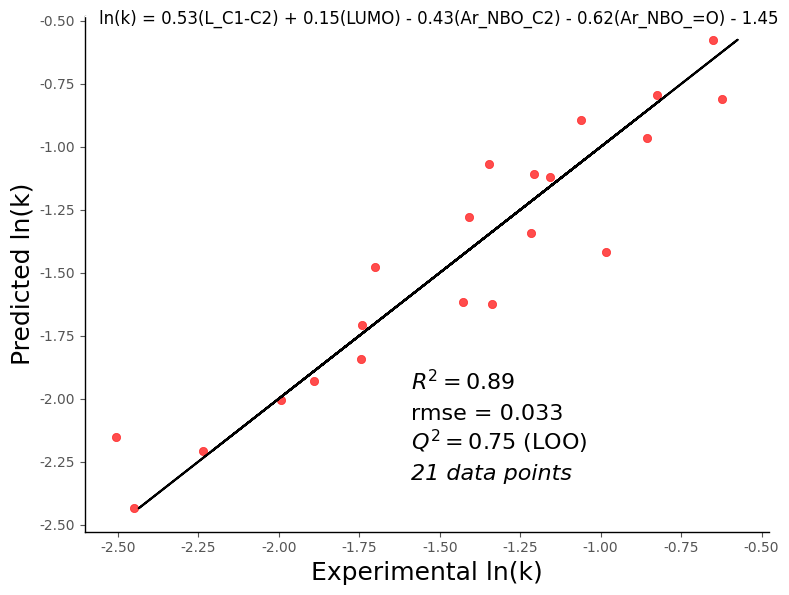

In [11]:
from matplotlib.ticker import FormatStrFormatter

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_facecolor('w')

ax.plot(y_pred1, y_pred1, color='k')
ax.scatter(y1, y_pred1, edgecolor='r', facecolor='r', alpha=0.7)
ax.set_ylabel('Predicted ln(k)', fontsize=18, color='k')
ax.set_xlabel('Experimental ln(k)', fontsize=18, color='k')
ax.spines['bottom'].set_color('k')
ax.spines['left'].set_color('k')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.text(0.13, 0.96, 'ln(k) = 0.53(L_C1-C2) + 0.15(LUMO) - 0.43(Ar_NBO_C2) - 0.62(Ar_NBO_=O) - 1.45', fontsize = 12)
fig.text(0.52, 0.35, '$R^2= 0.89$', fontsize = 16)
fig.text(0.52, 0.30, 'rmse = 0.033', fontsize = 16)
fig.text(0.52, 0.25, '$Q^2= 0.75$ (LOO)', fontsize = 16)
fig.text(0.52, 0.20, '21 data points', fontsize = 16, style = 'italic')

fig.tight_layout()

plt.savefig('N_aryl_N_alkyl_indigo_MeCN.png', bbox_inches='tight')